In [1]:
# %%
import sys
sys.path.append('../')

from configs.config import *
from utils.losses import * 
from utils.plot import * 
from utils.model import * 
from utils.utils import * 
from utils.env import * 
from utils.reward import * 

import numpy as np 
from torch import nn 
import torch
from torch.distributions.categorical import Categorical

from matplotlib import pyplot as plt 
from tqdm import tqdm, trange


In [2]:
# Instantiate model and optimizer
model = TBModel(10)
A_reward = SimpleReward()
env = Env(reward=A_reward)
gfn = TB_GFN(model, env)
opt = torch.optim.Adam(model.parameters(),  1e-3)

In [3]:
gfn.train(opt, N_EPISODES)

Training iter:   0%|          | 0/10000 [00:00<?, ?it/s]

Training iter (loss=77.941498): 100%|██████████| 10000/10000 [00:14<00:00, 695.78it/s]


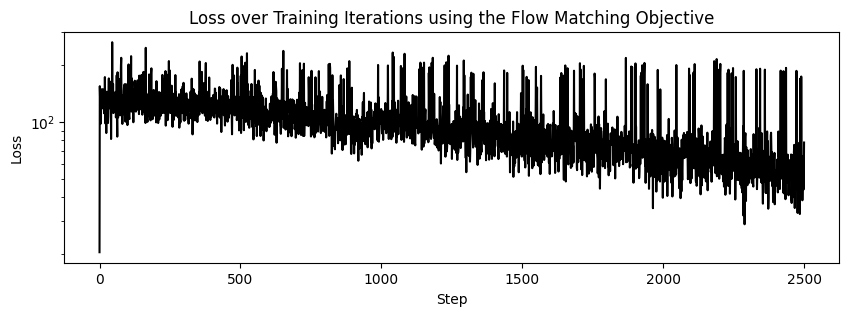

In [4]:
plot_loss_curve(gfn.losses, title="Loss over Training Iterations using the Flow Matching Objective")

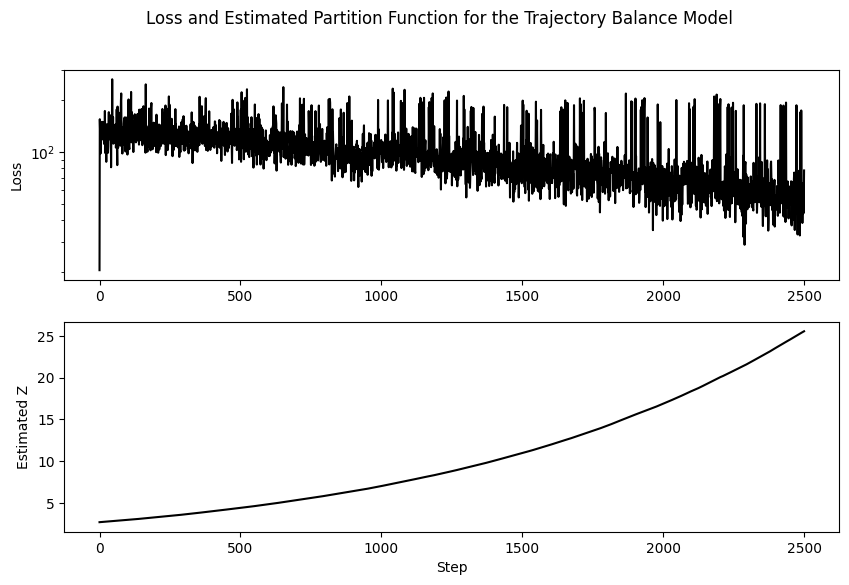

In [5]:
plot_loss_logZ_curves(gfn.losses, gfn.logZs)

In [6]:
print("The final Z (partition function) estimate is {:.2f}".format(model.logZ.exp().item()))

The final Z (partition function) estimate is 25.57


In [7]:
# Check samples
sampled_seqs = gfn.sample(10)
sampled_seqs


[[0, 2, 0, 0, 3],
 [0, 1, 0, 1, 3],
 [2, 2, 0, 0, 1],
 [0, 1, 3, 3, 2],
 [0, 0, 0, 0, 1],
 [0, 3, 0, 1, 0],
 [0, 2, 0, 3, 3],
 [0, 0, 0, 1, 1],
 [0, 0, 1, 0, 3],
 [2, 0, 0, 1, 3]]

Try with new reward

In [9]:
class NewReward(Reward):
    """Simple Reward class that counts number of A in sequence"""
    def __init__(self, name='simple_reward') -> None:
        super().__init__(name)
        
    def get_reward(self, state: list[str]) -> Float:
        # 2*occurrences of 'A' + 1* occurence of 'C' in state
        return float(state.count(CHAR_TO_IDX['C']) + 2*state.count(CHAR_TO_IDX['A']))

In [10]:
# Instantiate model and optimizer
model = TBModel(10)
new_reward = NewReward()
env = Env(reward=new_reward)
gfn = TB_GFN(model, env)
opt = torch.optim.Adam(model.parameters(),  1e-3)

In [11]:
gfn.train(opt, N_EPISODES)

Training iter (loss=85.050819): 100%|██████████| 10000/10000 [00:13<00:00, 723.00it/s]
